In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
traffic = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20221231.csv', encoding='euc-kr')
traffic.head(5)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2022,2022-01-01 10:00,주,토,1,0,0,0,0,전남,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,1000059,1660526,127.500646,34.939564
1,2022,2022-01-01 14:00,주,토,1,0,0,0,0,전북,...,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차,965929,1760951,127.122710,35.844490
2,2022,2022-01-01 17:00,주,토,1,0,0,0,0,경기,...,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,966667,2021002,127.119365,38.188669
3,2022,2022-01-01 20:00,야,토,1,0,0,0,0,부산,...,기타,안전운전 의무 불이행,단일로,고가도로위,승용차,승용차,1156990,1697307,129.225773,35.258920
4,2022,2022-01-02 06:00,주,일,1,0,0,0,0,서울,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,950217,1953529,126.936182,37.579800


In [72]:

# 모든 행을 출력
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [55]:
traffic.head(5)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,월,사상자,시간대
0,2022,2022-01-01 10:00:00,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,1000059,1660526,127.500646,34.939564,1,1,10
1,2022,2022-01-01 14:00:00,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차,965929,1760951,127.122710,35.844490,1,1,14
2,2022,2022-01-01 17:00:00,주,토,1,0,0,0,0,경기,연천군,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,966667,2021002,127.119365,38.188669,1,1,17
3,2022,2022-01-01 20:00:00,야,토,1,0,0,0,0,부산,기장군,차대차,기타,기타,안전운전 의무 불이행,단일로,고가도로위,승용차,승용차,1156990,1697307,129.225773,35.258920,1,1,20
4,2022,2022-01-02 06:00:00,주,일,1,0,0,0,0,서울,서대문구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,950217,1953529,126.936182,37.579800,1,1,6


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         2658 non-null   int64  
 1   발생년월일시      2658 non-null   object 
 2   주야          2658 non-null   object 
 3   요일          2658 non-null   object 
 4   사망자수        2658 non-null   int64  
 5   부상자수        2658 non-null   int64  
 6   중상자수        2658 non-null   int64  
 7   경상자수        2658 non-null   int64  
 8   부상신고자수      2658 non-null   int64  
 9   발생지시도       2658 non-null   object 
 10  발생지시군구      2658 non-null   object 
 11  사고유형_대분류    2658 non-null   object 
 12  사고유형_중분류    2658 non-null   object 
 13  사고유형        2658 non-null   object 
 14  가해자법규위반     2658 non-null   object 
 15  도로형태_대분류    2658 non-null   object 
 16  도로형태        2658 non-null   object 
 17  가해자_당사자종별   2658 non-null   object 
 18  피해자_당사자종별   2658 non-null   object 
 19  발생위치X_UTMK  2658 non-null  

1. 요일별 교통사고를 막대그래프 시각화
2. 월별 사상자 수 막대그래프 시각화 (사망 + 부상)
3. 차대차 사건중 사망자가 많은 발생지 시도를 알아보기위해 막대 그래프 시각화
4. 교통사고가 많이 일어나는 시간대 알아보고 파이 그래프 시각화
5. 광주지역 가해자 법규위반 사항별 사고 건수를 파이그래프로 시각화

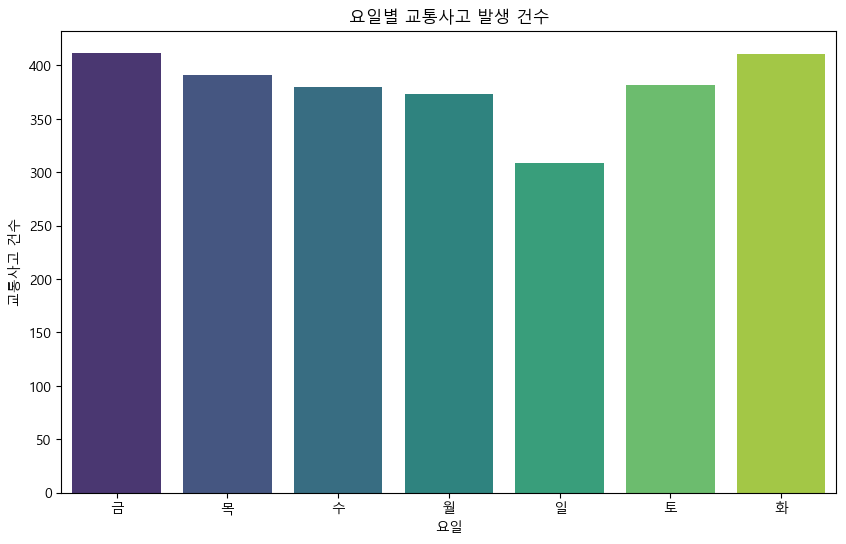

In [53]:
# 요일별 교통사고 건수
plt.rcParams['font.family'] = 'Malgun Gothic'
day_of_week = traffic['요일'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x = day_of_week.index, y = day_of_week.values, palette = 'viridis')
plt.title('요일별 교통사고 발생 건수')
plt.xlabel('요일')
plt.ylabel('교통사고 건수')
plt.show()

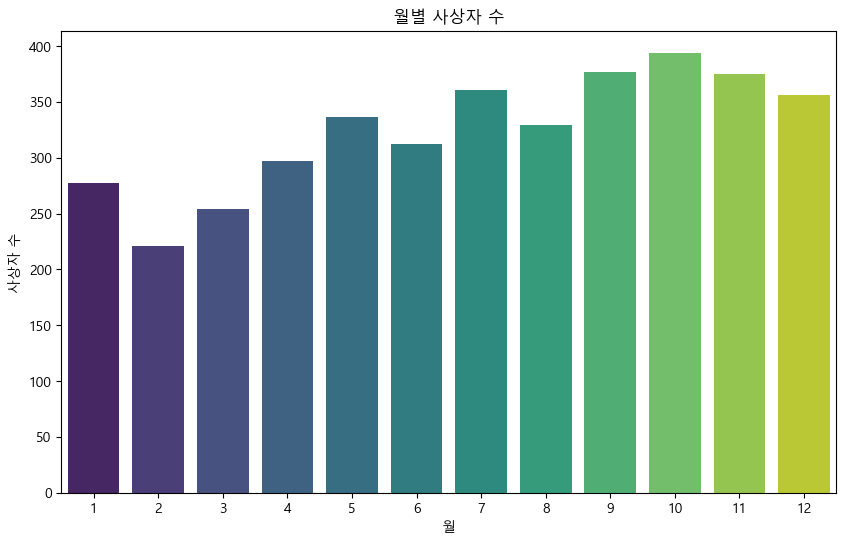

In [93]:
# '발생년월일시' 열을 datetime 형식으로 변환하여 '월' 정보를 추출
traffic['발생년월일시'] = pd.to_datetime(traffic['발생년월일시'])
traffic['월'] = traffic['발생년월일시'].dt.month

# 사상자 = (사망 + 부상)
traffic['사상자'] = traffic['사망자수'] + traffic['부상자수']

# 월별 사상자 수
month_count = traffic.groupby('월')['사상자'].sum()

# 시각화
plt.figure(figsize = (10, 6))
sns.barplot(x = month_count.index, y = month_count.values, palette = 'viridis')
plt.title('월별 사상자 수')
plt.xlabel('월')
plt.ylabel('사상자 수')
plt.xticks()
plt.show()

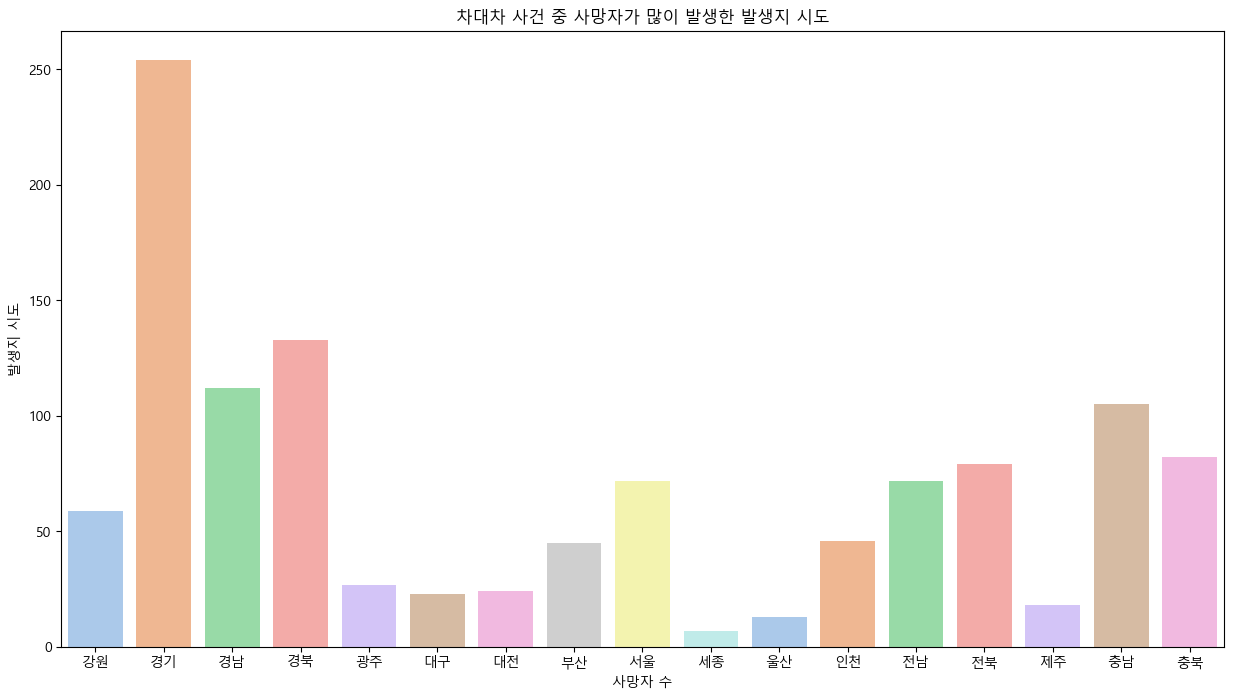

In [101]:
# 차대차 사건
car_by_car = traffic[traffic['사고유형_대분류'] == '차대차']

# 차대차 사건 중 사망자가 많은 발생지 시도
hurtlist = car_by_car.groupby('발생지시도')['사망자수'].sum()

# 시각화
plt.figure(figsize=(15, 8))
sns.barplot(x = hurtlist.index, y = hurtlist.values, palette='pastel')
plt.title('차대차 사건 중 사망자가 많이 발생한 발생지 시도')
plt.xlabel('사망자 수')
plt.ylabel('발생지 시도')
plt.show()

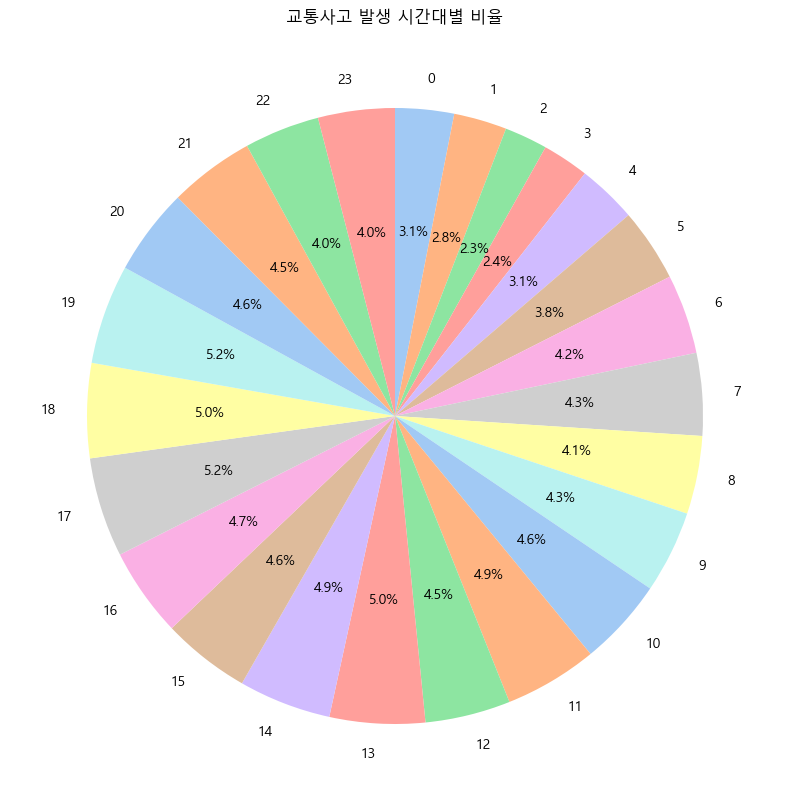

In [80]:
# '발생년월일시' 열을 datetime 형식으로 변환하여 '시간대' 정보를 추출
traffic['발생년월일시'] = pd.to_datetime(traffic['발생년월일시'])
traffic['시간대'] = traffic['발생년월일시'].dt.hour
colors = sns.color_palette("pastel")

# 교통사고가 많이 일어나는 시간대
accident_time = traffic['시간대'].value_counts().sort_index()

# 시각화
plt.figure(figsize = (10, 10))
plt.pie(accident_time, labels = accident_time.index, autopct = '%1.1f%%', colors = colors, startangle = 90, counterclock = False)
plt.title('교통사고 발생 시간대별 비율')
plt.show()

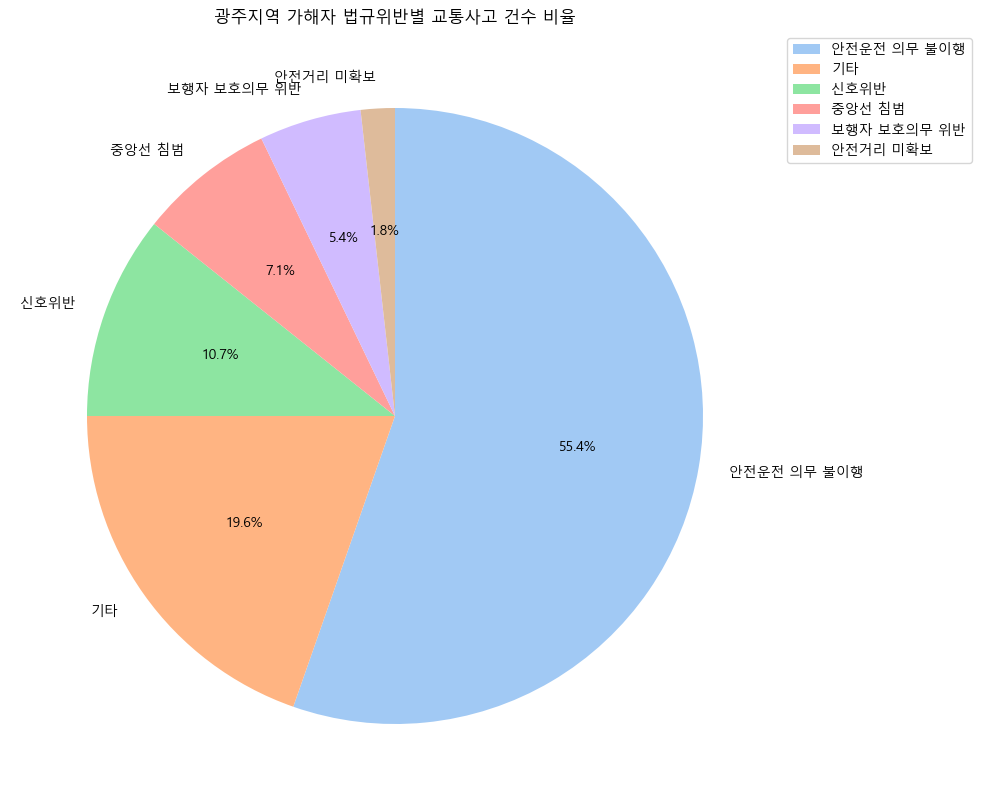

In [107]:
# 광주지역 필터링
gwangju_traffic = traffic[traffic['발생지시도'] == '광주']

# 광주지역 가해자 법규위반
gj_crime = gwangju_traffic['가해자법규위반'].value_counts()
colors = sns.color_palette("pastel")

# 시각화
plt.figure(figsize=(10, 10))
plt.pie(gj_crime, labels = gj_crime.index, autopct = '%1.1f%%', colors = colors, startangle = 90, counterclock = False)
# counterclock=True : 기본값으로, 파이 차트는 반시계 방향으로 그려집니다.
# counterclock=False : 시계 방향으로 그려집니다.

# legend 위치 이동시키기
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = "upper left")
plt.title('광주지역 가해자 법규위반별 교통사고 건수 비율')
plt.show()